## Content


1. **Airtel Churn Prediction: Business Case**

2. **Introduction to Logistic Regression**
 - Will Linear Regression Work for Churn Prediction ?
 - How is Logistic Regression different from Linear Regression ?
 - Can you see a problem between $w^Tx_i+w_0$ and $y_i$ ? 

3. **Step Function** 
 - Do we see a problem while using step function ?


4. **Sigmoid Function**
 - What do we mean by monotonically increasing function ?
 - What can be used to make value of $\hat{y_i}$ to be exactly 0 or 1 ?
 - Can we consider values of Sigmoid as Probability of $y = 1$ or $y = 0$ for $x$ ?
 
5. **geometric intution**
 - How does Sigmoid helps in creating a hyperplane $π$ which separates the data? 


6. **Code Implementation of sigmoid function**

7. **Mean Square Error not used**
 - How to compare $y_i$ vs $\hat{y_i}$? Should we use Mean Sqaure Error as the loss function ?

 
8. **LogLoss**
 - How can the drastic change in value of $-log(\hat{y_i})$ help ?  
 - What can we understand when we plot $-log(1-y_î)$  ?
 - How can logloss(L) $ = ∑_{i=1}^{i=n} [-y log(\hat{y_i}) - (1-y)log(1-\hat{y_i})] $ , justify the concept of $-log(\hat{y_i})$ and  $-log(1-\hat{y_i})$ ?


9. **Optimization**
 - if there is no non-linear feature, should we use Regularization?
 - What is the main thing we need to check for optimization ?
 - Gradient of LogLoss


10. **Code implementation of gradient Descent on LogLoss** 
 
11. **Performance - Accuracy Metric**
 - How  can we say, that the model we have got is the best one ?




# Business Case

You are a Data Scientist at **Airtel**, and you need to analyze on some features of Customer Service 
- To predict whether a Customer retains and uses the Airtel Services ($y=0$) or Churns to a new Competetive Telecom Company ($y=1$)






  <center><img src="https://drive.google.com/uc?id=1QxWuFOSbyFRo3HZY27G_z8khCp8SFw5o" width="900" height="500"> </center>

Lets Load the data

In [ ]:
#Churn prediction in telecom.
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
!gdown 1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m

Downloading...
From: https://drive.google.com/uc?id=1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m
To: /content/churn_logistic.csv
100% 494k/494k [00:00<00:00, 95.7MB/s]


In [ ]:
import pandas as pd 
churn = pd.read_csv("churn_logistic.csv")
churn.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


**Data Description**
<center>

| Records | Features | 
| :-- | :-- | 
| 5700 | 21 | 


| Id | Features | Description |
| :-- | :--| :--| 
|01| **state** | 2-letter code of the US state of customer residence|
|02| **account_length** | Number of months the customer has been with the current telco provider | 
|03|**area_code**|string="area_code_AAA" where AAA = 3 digit area code|
|04|**intl_plan**|The customer has international plan|
|05|**vmail_plan**| The customer has voice mail plan|
|06|**vmail_messages**|Number of voice-mail messages|
|07|**day_mins**|Total minutes of day calls|
|08|**day_calls**|Total no of day calls|
|09|**day_charge**|Total charge of day calls|
|10|**eve_mins**|Total minutes of evening calls|
|11|**eve_calls**|Total no of evening calls|
|12|**eve_charge**|Total charge of evening calls|
|13|**night_mins**|Total minutes of night calls|
|14|**night_calls**|Total no of night calls|
|15|**night_charge**|Total charge of night calls|
|16|**intl_mins**|Total minutes of international calls|
|17|**intl_calls**|Total no of international calls|
|18|**intl_charge**|Total charge of international calls|
|19|**customer_service_calls**|Number of calls to customer service|
|20|**phone**|10 digit number|
|21|**churn**|Customer churn - target variable|

Lets see the number of samples when $y=0$ and $y=1$

In [ ]:
churn["Churn"].value_counts()

0    2850
1    2850
Name: Churn, dtype: int64

**Observe**

The samples for both the values of $y$ are same
- Showing that the data is balanced or have equal number of samples for both the cases



# Introduction to Logistic Regression

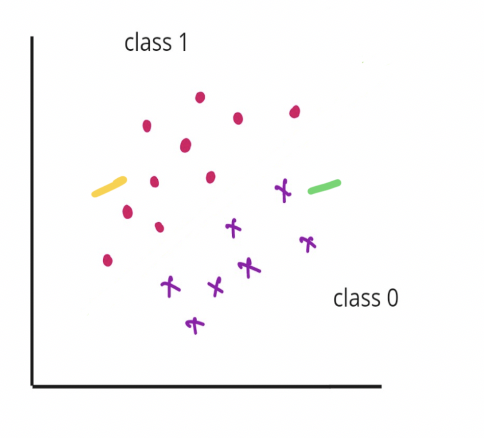

#### Will Linear Regression Work for Churn Prediction ?
Ans: No, since now the problem is to classify the data into Churn or Not-Churn 

- Also Linear Regression has $\hat{y} = w^Tx_i+w_0$ 
 - which has range  ($-∞,∞$) 
 - But $y$ has only 2 values i.e 0 and 1  

<br>

Since $y$ can have only two values {$0,1$}, 
- hence the Problem becomes a Binary Classification one 

With this, we introduce Logistic Regression  
- A simple Linear model 
- Which is used to handle Classification problem 

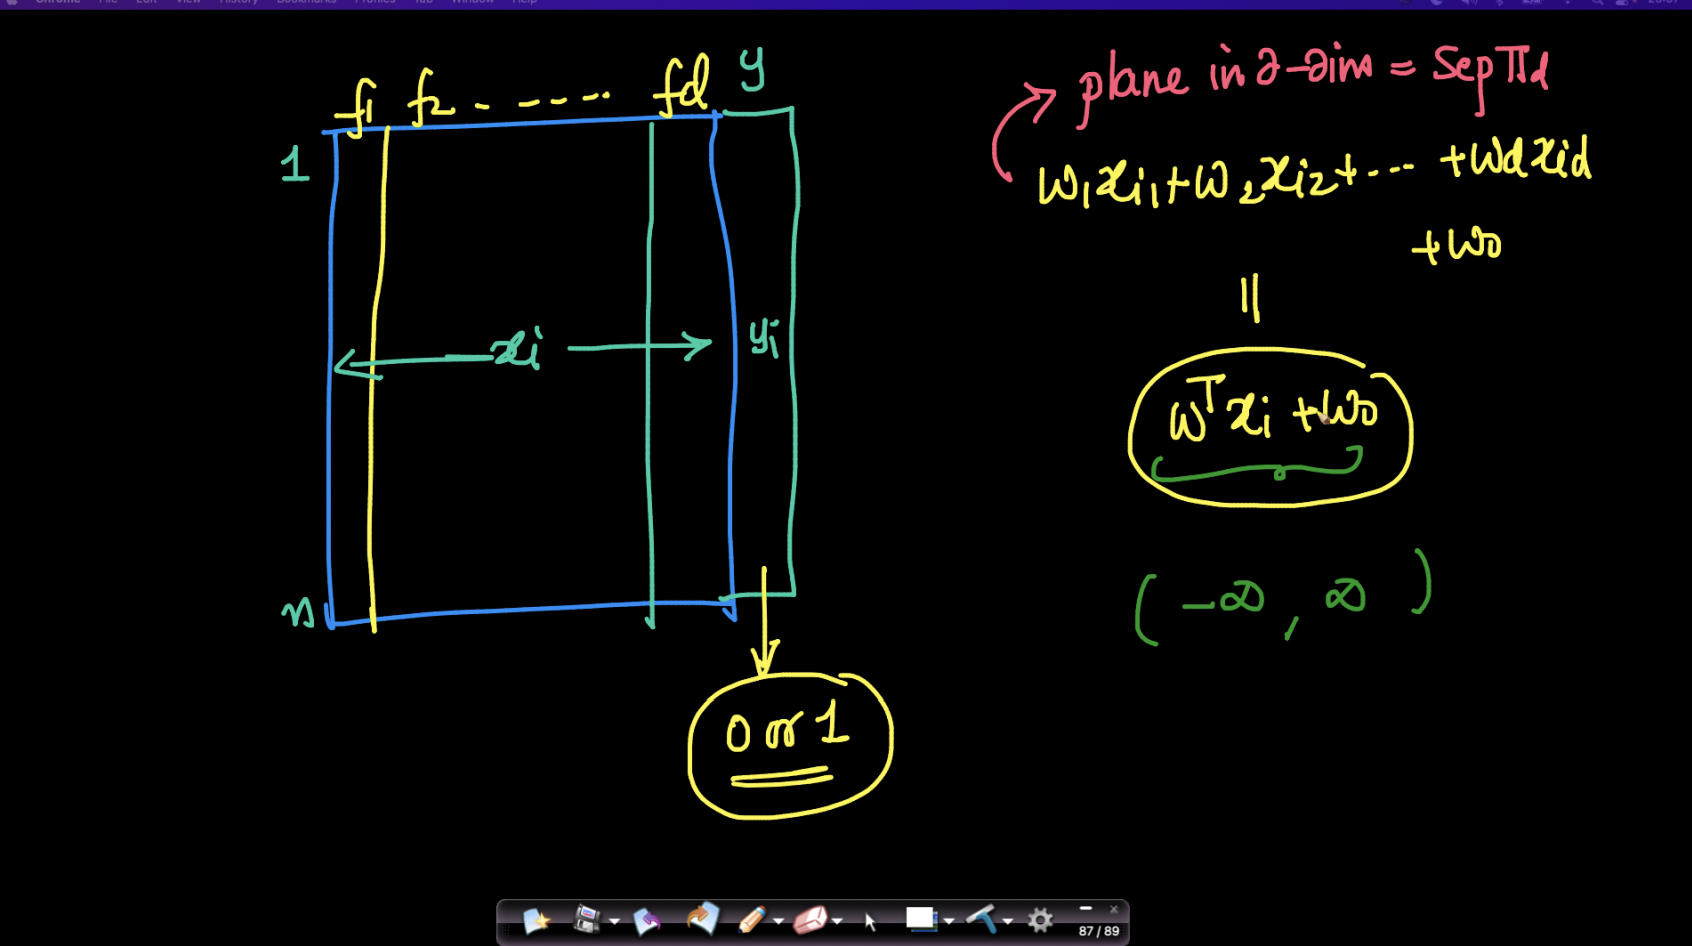


#### How does the data looks like ?

Ans: for ith sample in n samples, $x_i$ have d features and $y_i$ is either 0 or 1

#### What do we want to achieve ?
Ans: We want a hyperplane in d-dim that separates the data into 0 and 1 
- Hyperplane $π$: $w_1x_{i1}+w_2x_{i2}+w_3x_{i3}+.....+w_dx_{id}+ w_0 $ 
- Simplifed to:  $\pi = w^Tx_i+w_0$. 

<br>

#### How is Logistic Regression different from Linear Regression ?
The basic idea behind logisitic regression is to:
- Builts a hyperplane that separates the data 
- rather than follow the pattern of the data as done by linear Regression.

<br>

#### Can you see a problem between $w^Tx_i+w_0$ and $y_i$ ? 
- The range of the values of this function is ($-∞,∞$)
- But our output $y_i$ has only 2 values i.e 0 and 1

Hence we need of a function that maps values of $w^Tx_i+w_0$ to {0,1}


# **Step Function**

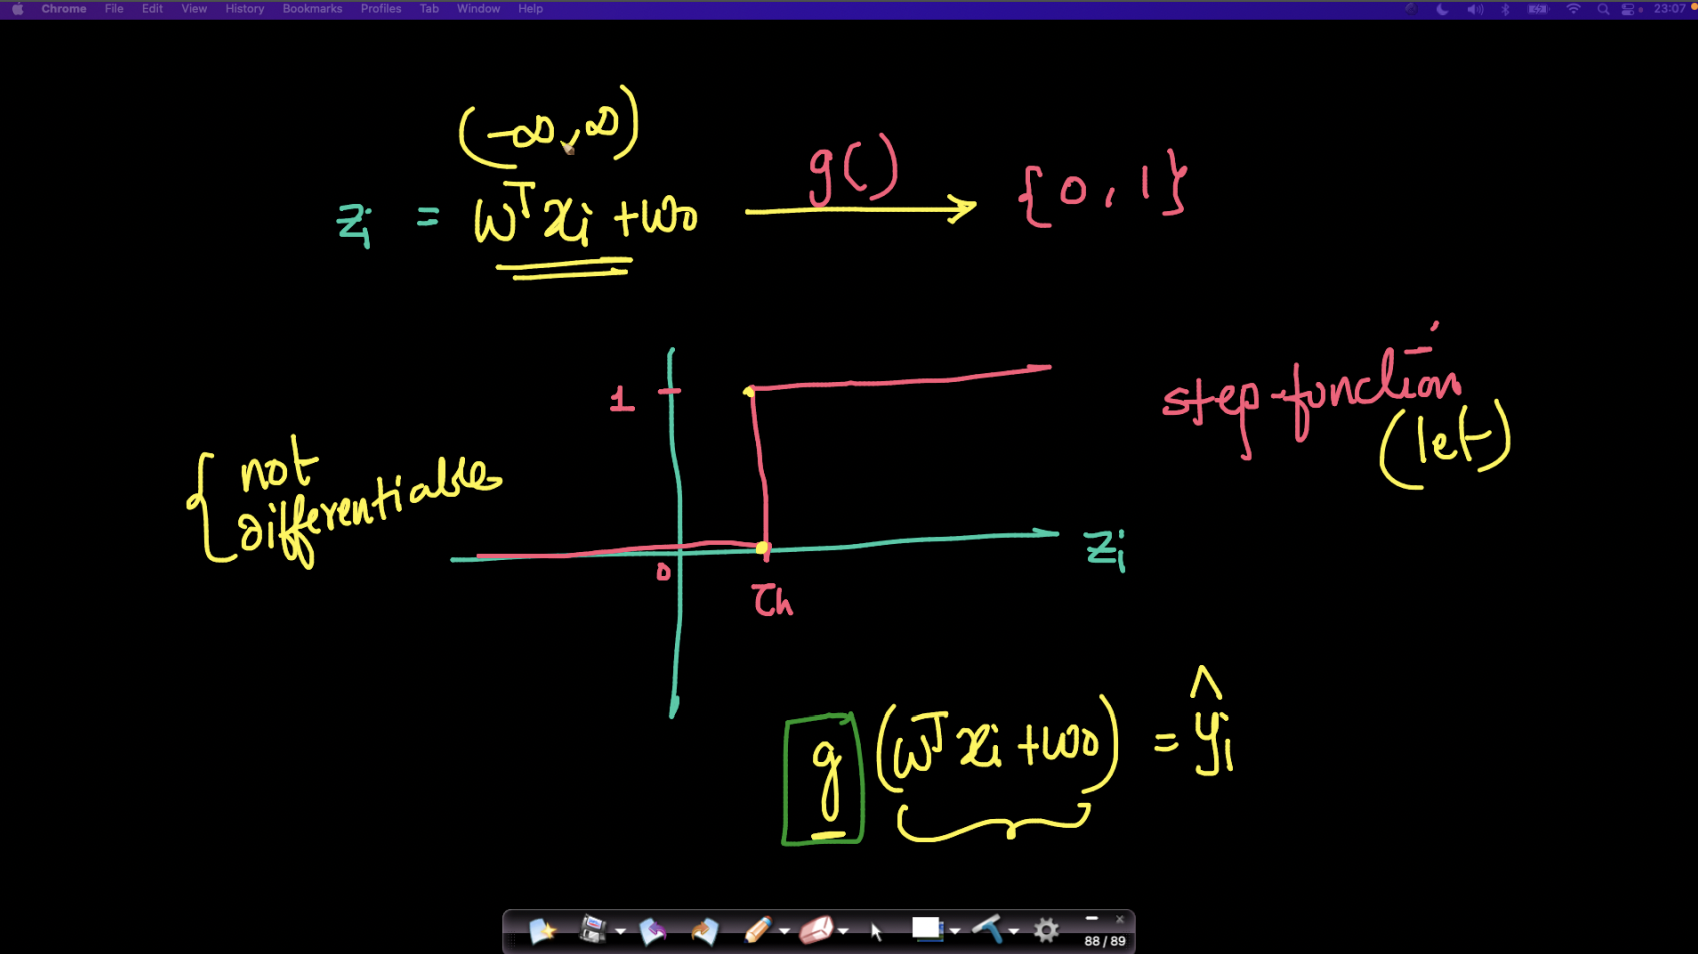

Lets define a function g() which has a threshold (th) such that
- value of $z_i = w^Tx_i+w_0$ < (th) = 0

- value of $z_i = w^Tx_i+w_0$ ≥ (th) = 1

- we get our $y_î = g(w^Tx_i+w_0) $ 

- this function g() is called a step function

**Note:**

we define our $\hat{y_i}$ after only applying our step function.

<br>

#### Do we see a problem while using step function ?
ANS: Step function is a non continous.  
 - Hence we cannot perform derivates of loss with respect to jth weight of the model $\frac{∂L(y,y_î)}{∂w_j} $ 


Therefore we need a smooth function 
- which is differentiable to perform optimization
 

# **Sigmoid Function**



<img src='https://drive.google.com/uc?id=1Fxx25-hs5ylag5BlY_iuQKqU9omS-39Z'>




Since our $z_i=w^Tx_i+w_0$

Now, we define a smooth, monotonically increasing and differentiable function  such that 
- $σ(z_i)$ tends to $0$ as $z_i$ tends  to $-∞$ 
- $σ(z_i)$ tends to $1$ as $z_i$ tends to $∞$ 

Therefore we can say, 
- Model prediction: $\hat{y_i} = σ(w^Tx_i + w_0)$ is in range (0,1)


<br>

#### How to we calculate $σ(z_i)$ ?
Ans: $σ(z_i)$ is defined as:
- $σ(z_i) = \frac{1}{1+e^{-z_i}}$

<br>

#### What do we mean by monotonically increasing function ?
Ans: the greater the value of $z_i$, the greater is the value of $σ(z_i)$

```
Lets take an Example:

Supposedly: z_1 = 998, z_2 = 1000 

Now if we find 
- σ(z_1) = σ(998) 
- And σ(z_2) = σ(1000)

We can say that:
- σ(z_2) > σ(z_1)
- Since z_2 > z_1 
```

**Note:**

$σ(z_1)$ and $σ(z_2)$ both will have value close to +1 
- Since both $z_1$ and $z_2$ are large +ve values 









  

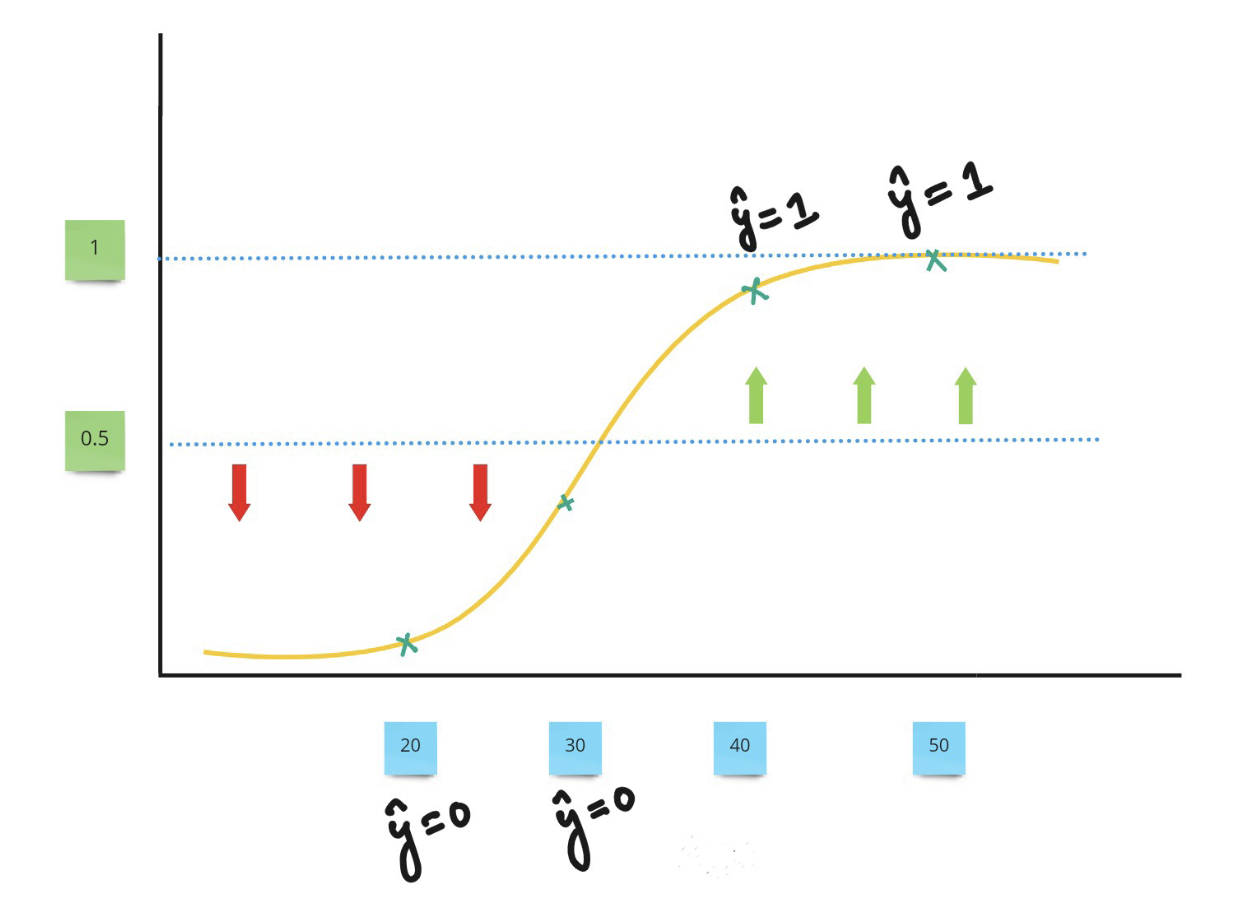

## Thresholding 


#### Can you notice there is a small problem when using Sigmoid function ?
 The predicted value, $\hat{y_i} = g(w^Tx_i+w_0) $  
- will have value between 0 and 1 (0,1)
-  while $y_i$ has only two values 0 or 1 {0,1}

<br>

#### What can be used to make value of $\hat{y_i}$ to be exactly 0 or 1 ?

Ans: Using a Threshold (th), such that:

- $\hat{y_i}$ ≥ th, $\hat{y_i}$ = 1
- $\hat{y_i}$ < th, $\hat{y_i}$ = 0 

```
for Example
if we take threshold as 0.5 , th = 0.5  
```
Then, 
- $\hat{y_i}$ ≥ 0.5, $\hat{y_i}$ = 1
- $\hat{y_i}$ < 0.5, $\hat{y_i}$ = 0 


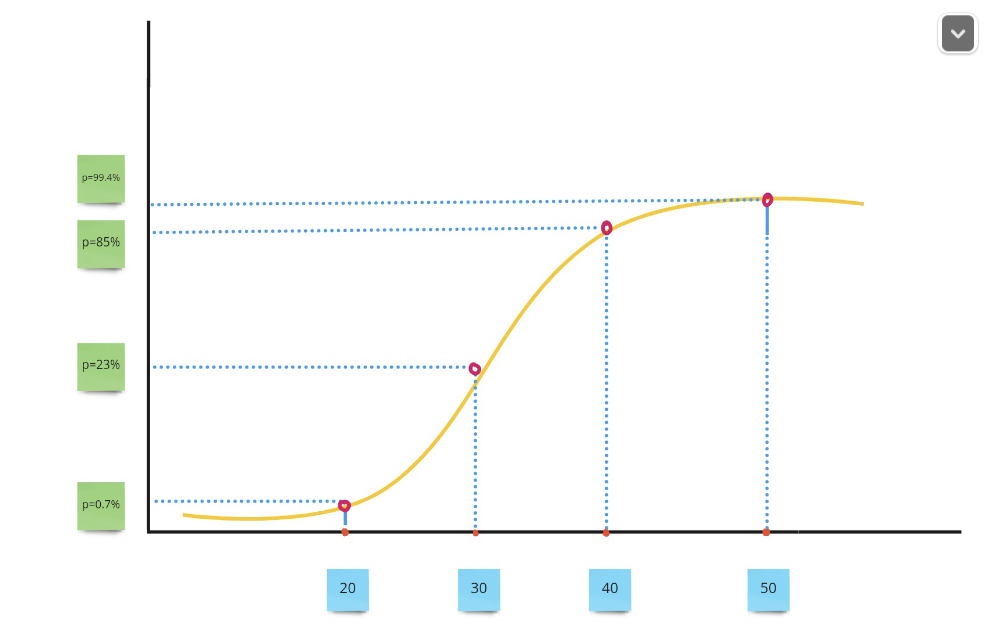

## Sigmoid as Probability 

#### Can we consider values of Sigmoid as Probability of $y = 1$ or $y = 0$ for $x$ ?

Ans: Yes, The sigmoid function values can be considered as 
- probability  of $y_i=1$ based on the features $x_i$

```
For Example: 

if the sigmoid gives output of 0.7 for some datapoint, we can say that: 
- The datapoint has 70% probability of being in class 1, or having y = 1


Similarly if the sigmoid value is 0.2 for a datapoint, we can say that: 
- it has 20% probability of being in class 1 or having y = 1

```

**Note:**

if a datapoint has 20% probability of being in class 1 then 
- it means it has 80% probability of being in class 0 


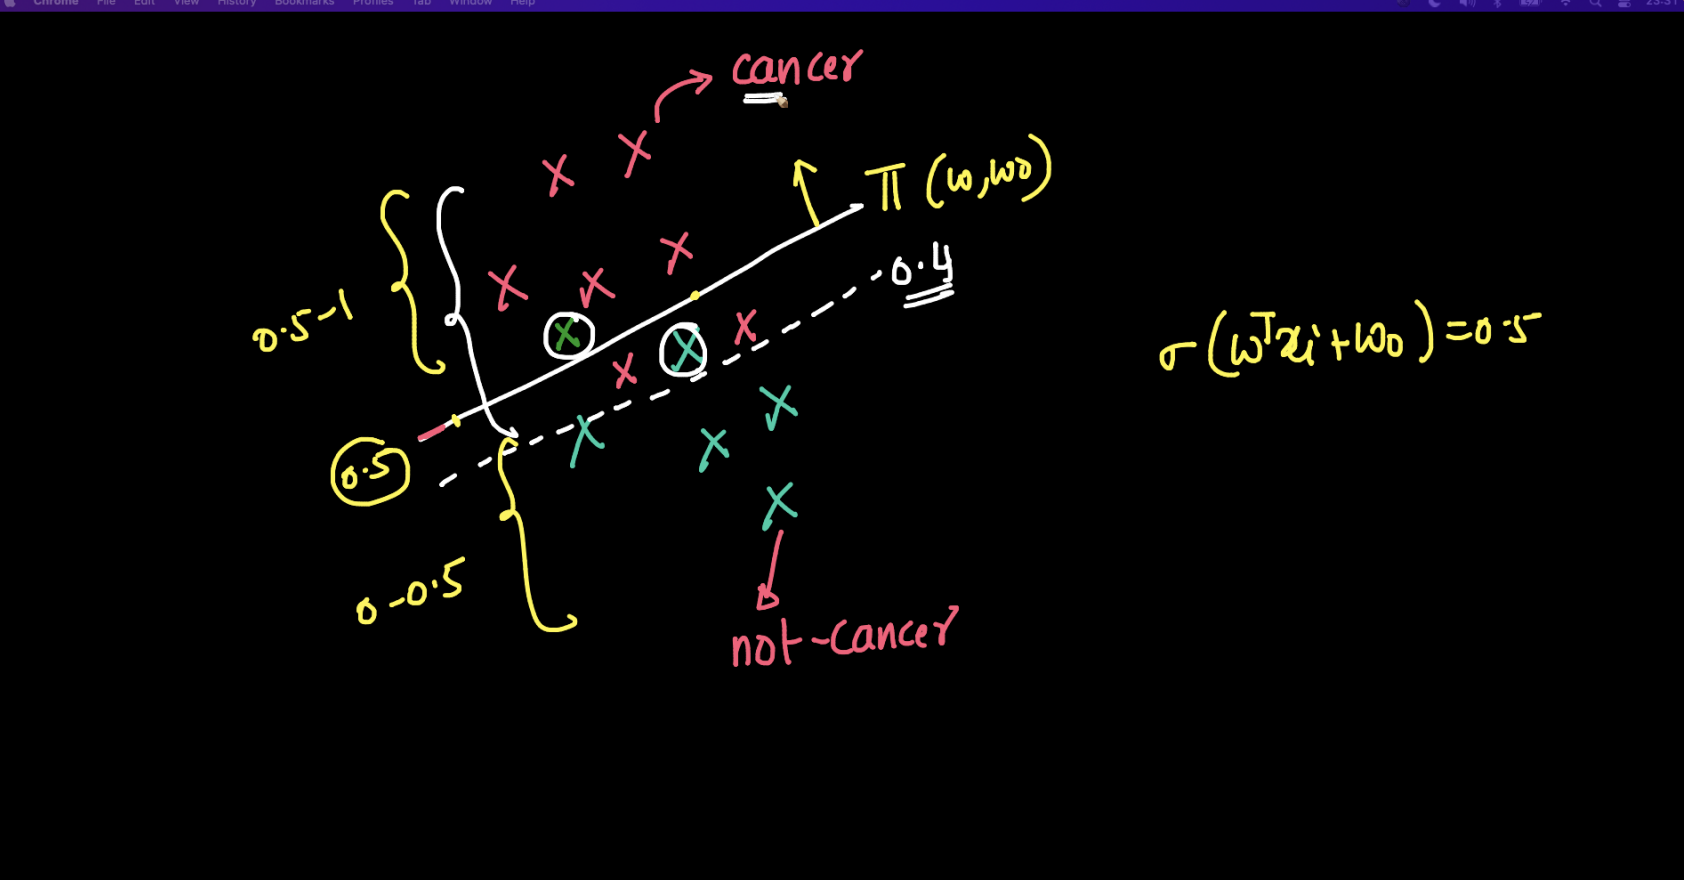

####**Question: Is 0.5 the only threshold we can have ?**

Ans: No, it depends on the problem . 

lets take an example 

```
if we want to classify data as Cancer and non-cancer
```
#### What will be happen if we keep a threshold of 0.5 ?

Ans: Logistic Regression classifies 2 cancer cases as non cancerous 
- which should not be since here we are talking about life and death situation for a patient

#### What about a threshold of 0.4 ?

Ans: Logistic Regression classifies 2 non cancer cases as cancerous while covering all the cancer cases which is still fine, 
- since the later tests would prove that those patients do not have cancer  




#Summarizing 



<img src='https://drive.google.com/uc?id=1bN_vVAhbdTMpRbEAGOEbMXuFInnZ2CFG'>

- The g() we defined is a **Sigmoid function**
- algebraically defined as $g(z_i) = σ(z_i) = \frac{1}{1+e^{-z_i}} $
- Sigmoid just squishes the range of $(-∞,∞)$ to $(0,1)$

#### What can we say about sigmoid when $z_i = w^Tx_i + w_0 = 0 $ ? 
Ans: $σ(z_i) = \frac{1}{1+e^0} = \frac{1}{1+1} = 0.5 $

Hence,
- if $w^Tx_i + w_0>0$ ,then $σ(z_i)> 0.5$ 
- if $w^Tx_i + w_0<0$ ,then $σ(z_i)< 0.5$



    

# **Geometric Intution**

<img src='https://drive.google.com/uc?id=1NOfRXC7UZ4WIaEAYlORH8cKU7c_gKelK'>







#### How does Sigmoid helps in creating a hyperplane $π$ which separates the data? 

Lets understand this geometrically, 

<br>

>Suppose we have a **hyperplane $π$** defined when $σ = 0.5$ with  $z_i = w^Tx+w_0=0$ 
>
>Now, we have three points, 
- $x1$ lying on the same hyperplane $Π$, 
- $x2$ lying on a hyperplane $Π_1$,   
- and $x3$  lying on a hyperplane $Π_2$

**Note**
 Both the hyperplanes $Π_1$ and $Π_2$ are parallel to $Π$

<br>


#### **What will be the sigmoid value for $x2$ and $x3$ ?**
Ans: Since  $x2$ lies above the hyperplane $π$, hence we can say:
- $w^Tx_i + w_0>0$ , $σ(z_2)> 0.5$ or belong to class 1

<br>

And $x3$ lies below the hyperplane $π$, hence we can say:
- $w^Tx_i + w_0<0$ , $σ(z_3)< 0.5$ or belong to class 0

<br>

Hence, Sigmoid function with threshold, creates a hyperplane that separates out the data 





#  **Code implementation of sigmoid function**

Now let's see a simple code for sigmoid function

Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

Defining sigmoid function

In [ ]:
def sigmoid(x):
    return 1/(1+np.e**-x)


Visualizing sigmoid

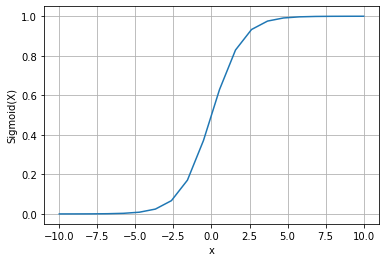

In [ ]:
x = np.linspace(-10, 10, 20) # 20 equidistant points between -10 and 10
z = sigmoid(x)

plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
plt.grid()
plt.show()

<img src='https://drive.google.com/uc?id=1zGdf4smFWRnR-LuAFwZyvcv8MkNG19ga'>




- plot shows: 
    - when σ() close to 0.5, the rate at which the sigmoid value increases and decreases  very fast
    - And as σ() go further away from 0.5 and towards 1 or 0, the rate at which the sigmoid value increases and decreases gets plateaued.

For example:
- if we take x1 =7.5 and x2 = 10.0
- we know $σ(z_1) < σ(z_2)$ as sigmoid monotonically increasing
- But the difference between $σ(z_2)- σ(z_1)$ would be very small 



# **Mean Square Error not used**

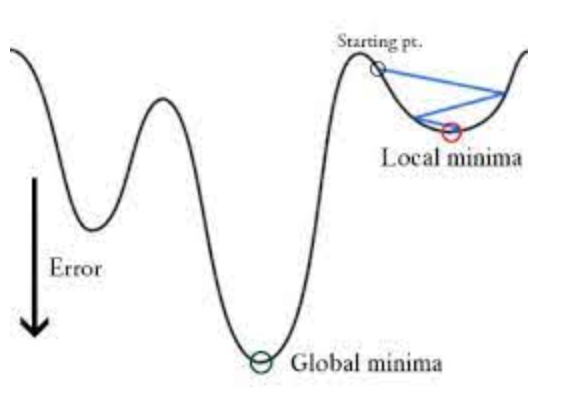

#### **How to compare $y_i$ vs $\hat{y_i}$? Should we use Mean Sqaure Error as the loss function ?**

Ans: No, Mean Square Error should not be used because:
- Sigmoid function makes $\hat{y_i} = \frac{1}{1+e^{-z_i}}$ as a **non-linear function**

<br>

Hence, if we plot the Mean Square error between $y$ and $\hat{y}$ 
- it produces a non-Convex Function
- And the Gradient Descent algorithm can stuck in a local Minima, 

Thus, making the weights of the model not optimum.

<br>



# **LogLoss**




<img src='https://drive.google.com/uc?id=1R_C_cXOpra4Y6Xz0U0IcDrlMrM0M1_6w'>



Since, Mean Sqaure Error cannot be used as a Loss function,
-  We use Log-Loss as the loss function for Classification of data 

<br>

For Log-loss function we say,
- when $y_i=1$, log loss is equal to $-log(\hat{y_i}  $)
- when $y_i=0$, log loss is equal to $-log(1-\hat{y_i} $)

<br>

**Observe**

when $y_i=1$ and log loss is equal to $-log(y_i ̂ $), the plot shows:
- the value of $-log(y_î)$ decreases drastically as $\hat{y_i} $ moves from 0 towards 1

<br>

#### How can the drastic change in value of $-log(\hat{y_i})$ help ?  
Ans: $-log(\hat{y_i})$ is very high when $y_i = 1$ and $\hat{y_i} = 0 $ 
- And how $-log(\hat{y_i})$ is very low or equal to 0 when $y_i = 1$ and $y_î = 1 $ 

Thus, $-log(\hat{y_i})$ highly penalizes the logistic Regression model, when $\hat{y_i} = 0 $  and $y_i = 1$ 

<br>


Similarly, if we consider only the case when $y_i = 0 $, log loss is equal to $-log(1- \hat{y_i}  $), then plot shows:
- how drastically the value of $-log(1-\hat{y_i})$ increases as $\hat{y_i} $ moves from 0 towards 1

<br>

#### What can we understand when we plot $-log(1-y_î)$  ?
- if $y_i = 0$ and $y_î = 0 $ $-log(1-y_î)$ is very small or close to 0 
- but if $y_i = 0$ and $y_î = 1 $ $-log(1-y_î)$ is very large



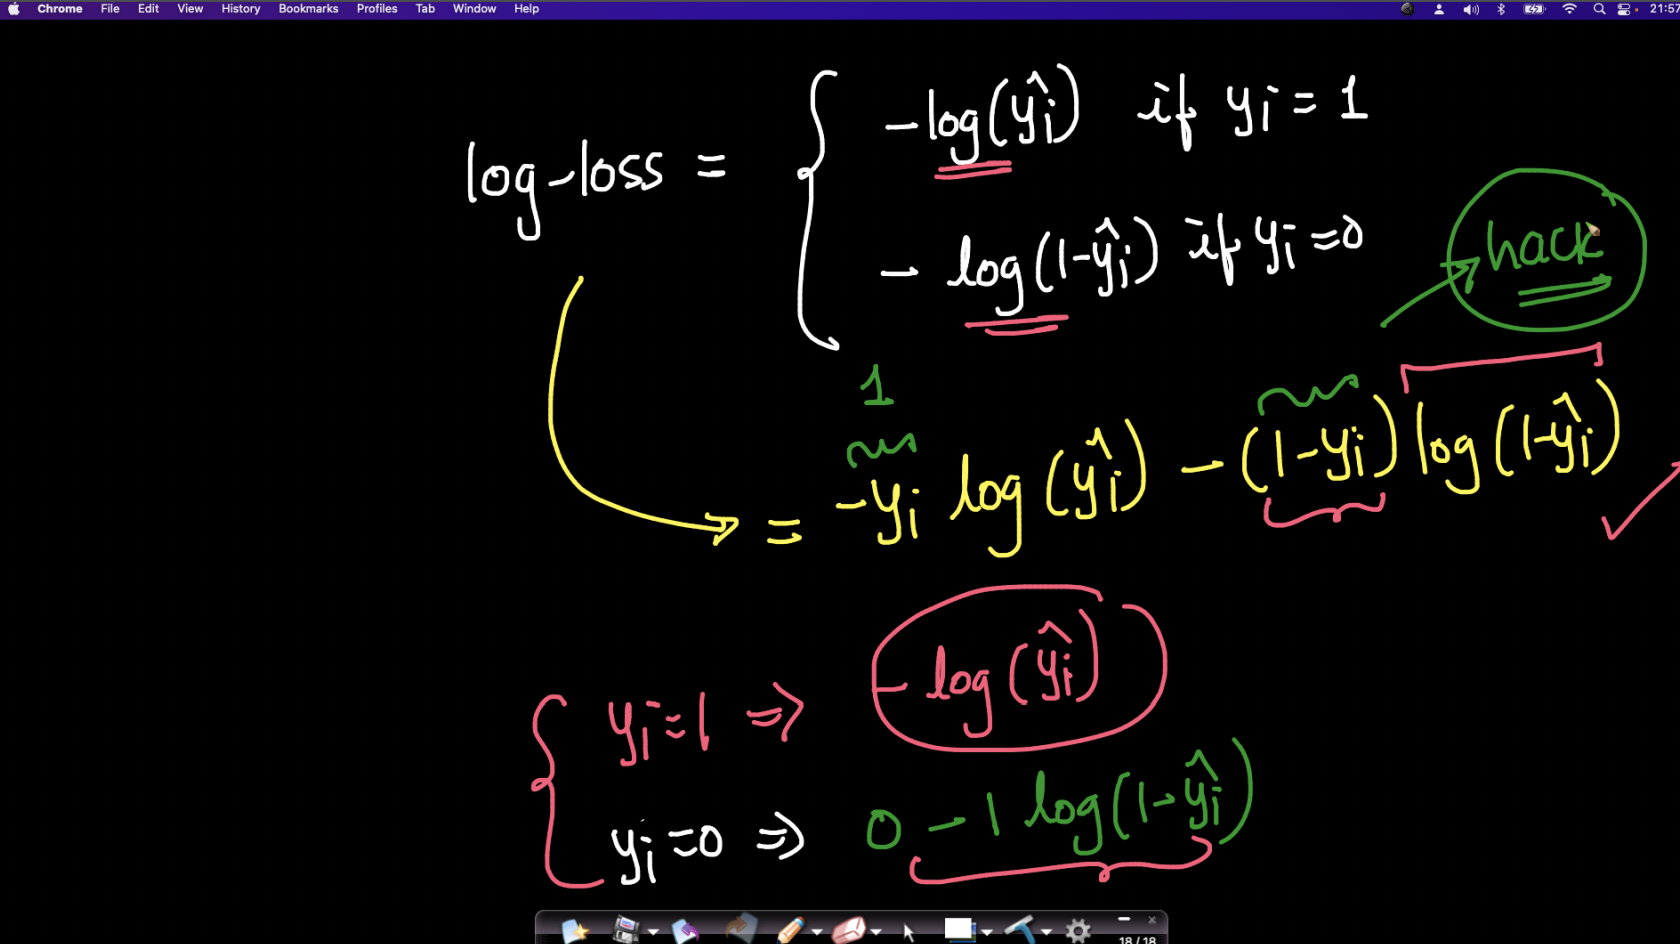


#### How can logloss(L) $ = ∑_{i=1}^{i=n} [-y log(\hat{y_i}) - (1-y)log(1-\hat{y_i})] $ , justify the concept of $-log(\hat{y_i})$ and  $-log(1-\hat{y_i})$ ?
When $y_i = 1$
- logLoss $= -(1) log(\hat{y_i}) - (1-1)log(1-\hat{y_i}) = -log(\hat{y_i})$

And when $y_i = 0$ 
- logLoss $= -(0)log(\hat{y_i}) - (1-0)log(1-\hat{y_i}) = -log(1-\hat{y_i})$    




Now let's a take a look at how to implement log-loss function

Case1: 
- When $y_i = 1$ and $y_î = 0.9$

In [ ]:
import math 

y = 1
yhat=0.9
print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

0.10536051565782628


- Notice how loss is almost 0.1 which is close to 0. 


Lets bring $\hat{y_i}$ even closer to 1 

Case2: 
- When $y_i = 1$ and $y_î = 0.99$

In [ ]:
y = 1
yhat = 0.99

print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

0.01005033585350145


- observe how just by incrementing $\hat{y_i}$ by 0.09, there is a drastic decrease in loss

- Now lets see what happens when  $\hat{y_i}$ gets closer to 0

Case3: 
- When $y_i = 1$ and $y_î = 0.1$

In [ ]:
y=1
yhat=0.1
print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

2.3025850929940455


- Notice much high the log-loss is

Lets bring $\hat{y_i}$ even closer to 0

Case4: 
- When $y_i = 1$ and $y_î = 0.01$

In [ ]:
y=1
yhat=0.01
print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

4.605170185988091


- observe how just by a small variation in $\hat{y_i}$, there is a drastic increase in loss


Now lets see what happens for the scenario when :  

Case5: 
- When $y_i = 0 $ and $y_î = 0.1$


In [ ]:
y=0
yhat=0.1
print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

0.10536051565782628


- notice how there is a small loss for it which is identical to case 1

- now lets bring $\hat{y_i}$ closer to 0

Case6:
- When $y_i = 0 $ and $y_î = 0.01$

In [ ]:
y=0
yhat=0.01
print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

0.01005033585350145


- notice how loss decreased similar to case 2 


Case6:
- When $y_i = 0 $ and $y_î = 0.9$

In [ ]:
y=0
yhat=0.9
print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

2.302585092994046


- As expected now, the loss will be high 

To summarize:
- The value of **log-loss is decreases** as our $\hat{y_i}$ is geting closer to $y_i$

- and **log loss is increasing** as our $\hat{y_i}$ is geting farther from $y_i$

this means that, 
- we can use Optimization techniques, like gradient descent, to  log-loss function to get the optimal weights of the logistic regression model

# **Optimization**


## Regularisation


<img src='https://drive.google.com/uc?id=1ps7CIjHM1E-4W5RKpARI7rSQu8bE-A91'>



#### Question: if there is no non-linear feature, should we use Regularization?

Ans: yes, to avoid overfitting of the model.

- hence we add an L-2 Regularization term to the loss function L 

Now, gradient descent has to perform gradients on the equation: 
- $min_{w_j}∑_{i=1}^n[-y log(y_î) - (1-y)log(1-y_î)+λ∑_jw_j^2]$

Now, we have to regularise the same 
* For which we will use the regularization term which is $λ∑_jw_j^2$
* This is same as Linear Regression 


<br>
<br>


#### What is the main thing we need to check for optimization ?

The loss function should be differentiable.

<br>

Lets break the loss term in to parts to check for differentiability

1. Check if log is differentiable
    - We saw in the pre-read
    - $\frac{d log(x)}{dx} = \frac{1}{x}$


2. We know Regularization is Differentiable 

3. Now to check wether $\hat{y_i} = σ(w^Tx_i+w_0)$ is differentiable or not 
    -  From Linear Regression lecture, we know that $w^Tx_i+w_0$ is differentiable
    - Now we need to check for sigmoid function,  $σ = \frac{1}{1+e^{-z} }$
    - Turns out that the sigmoid functuon is a differentable function : $σ'(z) = σ(z)(1-σ(z))$
    - If you are interested, you can check the prove for this in today's post-read 

Hence we can use Gradient Descent for our loss function.








## Gradient of LogLoss

Now that we know the log-loss is differentiable, lets find the gradient of the log-loss

Before derivating log-loss, lets recall the pre-read which shows the Simple Derivation Rules 

#### Simple Derivation rules 


1. **Power Derivative**

 $$\frac{d x^{n}}{dx} = n.x^{n-1}$$

 Similarly

  $$\frac{d x^{-n}}{dx} = -n.x^{-(n+1)}$$

2. **Log Derivative**

$$\frac{d log(x)}{dx} = \frac{1}{x}$$


3. **Exponential Derivative**

 $$\frac{d e^{ax}}{dx} = a.e^{ax}$$

 Similarly, 

 $$\frac{d e^{-ax}}{dx} = -a.e^{-ax}$$



---



Now our log-loss is defined as:
- $$Logloss (L) = min_{w_j}∑_{i=1}^n[-y log(y_î) - (1-y)log(1-y_î) $$

- What all we know 
    - $$\frac{d log(x)}{dx} = \frac{1}{x}$$
    - $$ σ'(z) = σ(z)(1-σ(z)) $$
    - $$ \frac{\partial (w^Tx_i+w_0)}{\partial w_j} = x_i $$

Also recall chain rule
- if $u = \sigma(z)$ , where $z = 3x $,then 
$$\frac{du}{dx} = \frac{du}{dz} * \frac{dz}{dx} $$

-  Therefore $\frac{du}{dz} = \frac{d\sigma(z)}{dz} = \sigma(z)(1-\sigma(z))$
- And $ \frac{dz}{dx} = \frac{d(3x)}{dx} = 3 $
- hence final equation becomes:  
- $$\frac{du}{dx} = \sigma(z)(1-\sigma(z))  * 3 $$

--- 

With the same concept:

$$\frac{\partial L}{\partial w_j} = \frac{\partial L}{\partial y_i ̂} * \frac{\partial y_i ̂}{\partial z_i} * \frac{\partial z_i}{\partial w_j} $$

Now lets take $\frac{\partial L}{\partial y_i ̂}$:
- $$ \frac{\partial L}{\partial w_j} = y\frac{1}{y_i ̂}* \frac{\partial y_i ̂}{\partial z_i} - (1-y)\frac{1}{1-y_i ̂}* (-1)* [\frac{\partial(1- y_i ̂)}{\partial z_i} ] $$

On solving $ [\frac{\partial(1- y_i ̂)}{\partial z_i} ] $
- $$ \frac{\partial L}{\partial y_i ̂} = y\frac{1}{y_i ̂}* \frac{\partial y_i ̂}{\partial z_i} - (1-y)\frac{1}{1-y_i ̂}* (-1)* [\frac{\partial (1)}{\partial z_i}- \frac{\partial y_i ̂}{\partial z_i} ] $$

which can be simplified since, $\frac{d(constant)}{dx} = 0 $

- $$ \frac{\partial L}{\partial y_i ̂} = y\frac{1}{y_i ̂}* \frac{\partial y_i ̂}{\partial z_i} - (1-y)\frac{1}{1-y_i ̂}*(-1)*\frac{\partial y_i ̂}{\partial z_i} $$

- $$ \frac{\partial L}{\partial y_i ̂} = y\frac{1}{y_i ̂}* \frac{\partial y_i ̂}{\partial z_i} + (1-y)\frac{1}{1-y_i ̂}*\frac{\partial y_i ̂}{\partial z_i} $$
Now we know  $ y_i ̂ =  σ(z) $, 

and $$\frac{σ(z)}{dz} =  σ(z)(1-σ(z)) = y_i ̂ (1- y_i ̂)$$

- Therefore $$ \frac{\partial y_i ̂}{\partial z_i} = y_i ̂(1-y_i ̂) $$


Subsituting it to our equation, 


- $$ \frac{\partial L}{\partial w_j} = y\frac{1}{y_i ̂}* y_i ̂(1-y_i ̂) \frac{\partial z_i }{\partial w_j} + (1-y)\frac{1}{1-y_i ̂}*y_i ̂(1-y_i ̂) \frac{\partial z_i}{\partial w_j}$$


On simplifying since we can cut some terms in the numerator and denominator

-  $$ \frac{\partial L}{\partial w_j} = -y(1-y_i ̂) \frac{\partial z_i }{\partial w_j} + (1-y)*y_i ̂ \frac{\partial z_i}{\partial w_j}$$

Now on opening the round brackets we get,
- $$ \frac{\partial L}{\partial w_j} = -y\frac{\partial z_i }{\partial w_j} + y*y_i ̂ \frac{\partial z_i }{\partial w_j} + y_i ̂ \frac{\partial z_i}{\partial w_j} - y*y_i ̂ \frac{\partial z_i}{\partial w_j}$$

Now on further solving, we get 
- $$ \frac{\partial L}{\partial w_ĵ} = -y\frac{\partial z_i }{\partial w_j} + y_i ̂ \frac{\partial z_i}{\partial w_j}$$
- $$ \frac{\partial L}{\partial w_j} = (y_i ̂-y) \frac{\partial z_i}{\partial w_j}$$

Since $z_i = w^Tx_i+w0$, $\frac{\partial z_i}{\partial w_j} = x_{ij}$

Therefore equation becomes:
- $$ \frac{\partial L}{\partial w_ĵ} = \frac{1}{n}∑_{i=1}^{i=n}(y_i ̂-y) x_{ij}$$


# Code implementation of gradient Descent on LogLoss

Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

defining Model and sigmoid function

In [ ]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

def predict(X,weight):
    """
    X - np array (m,n)
   weight - np arrary (n, 1)
    """

    # same as Linear Model y = w^T + w0
    y = np.dot(X, weight)

    # Only for y_hat in Logistic Regression, sigmoid is needed
    y_hat = sigmoid(y)
    return y_hat


LogLoss function

In [ ]:
def error(X, y, weight):
    """
    params:
        X - np array (m,n)
        y - np array (m,1)
        weight - np arrary (n,1)
    
    return :
        scalar value = loss value
    """
    model = predict(X, weight)

    # Finds the LogLoss 
    Loss = -1 * (np.mean((y*np.log(model) + (1-y)*np.log(1 - model))) )
    
    return Loss



Optimisation using Gradient descent

In [ ]:
def gradient(X, y, weight):
    """
    X - (m,n)
    y - (m,1)
    weight - (n,1)
    
    return - (n, 1)
    """
    model = predict(X, weight)

    # Gradient (1/n)*(y_hat-y)*x
    grad = (np.dot(X.T, (model - y)))
    return grad/X.shape[0]

Performing Gradient Descent for 30 epochs with ```lr=0.5```

In [ ]:
def gradient_descent(X, y, lr = 0.5, epochs = 30):
    
    weight = np.zeros((X.shape[1], 1))
    error_list = []
    
    for _ in range(epochs):

        # Finds LogLoss same as how Linear Regression find MSE
        loss = error(X, y, weight)
        error_list.append(loss)
        
        # Computes gradient
        grad = gradient(X, y, weight)
        
        #Update Rule
        weight = weight - lr*grad
    
    return weight, error_list
    


Creating some data for simplicity 
- Since real world problems are more tricky and lots of EDA are required 

In [ ]:
##dataset creation
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, 
                           n_features=2, 
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=5)
#converting row vector to column vector
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(500, 2) (500, 1)


Weights of the model 

In [ ]:
weight = np.zeros((X.shape[1], 1))
weight

array([[0.],
       [0.]])

Plotting the data 

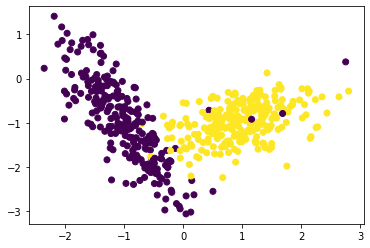

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()


Adding bias term

In [ ]:
ones= np.ones((500,1))
X_ = np.hstack((ones, X))
X_[:5]
X_.shape

(500, 3)

Splitting the data into train and test
- To test the model on unseen data

In [ ]:
from sklearn.model_selection import train_test_split


# reserving 20% of the data for testing purposes
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=42)


Train the model

In [ ]:
opt_weight, error_list = gradient_descent(X_train, y_train)

Checking the learned parameters and loss

In [ ]:
##learned parameters
opt_weight

array([[0.11877655],
       [2.30509204],
       [0.11405031]])

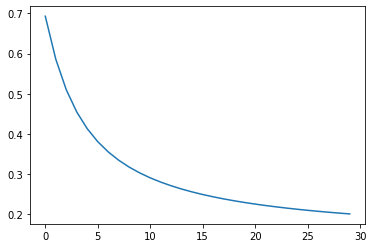

In [ ]:
plt.plot(error_list)

Plotting the Hyperplane that best separates the original data

In [ ]:
##generating points to plot the learned line
x1 = np.array([-1,1])
x2 = - (opt_weight[0] + opt_weight[1]*x1) / opt_weight[2]
print(x2)

[ 19.16974639 -21.25262639]


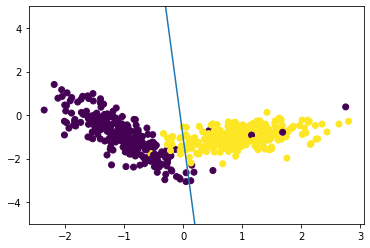

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.ylim((-5,5))
plt.plot(x1, x2)
plt.show()



**observe**

The hyperplane does separates most of the data correctly 
- But still there are few datapoints which are misclassified 



# **Performance - Accuracy Metric**

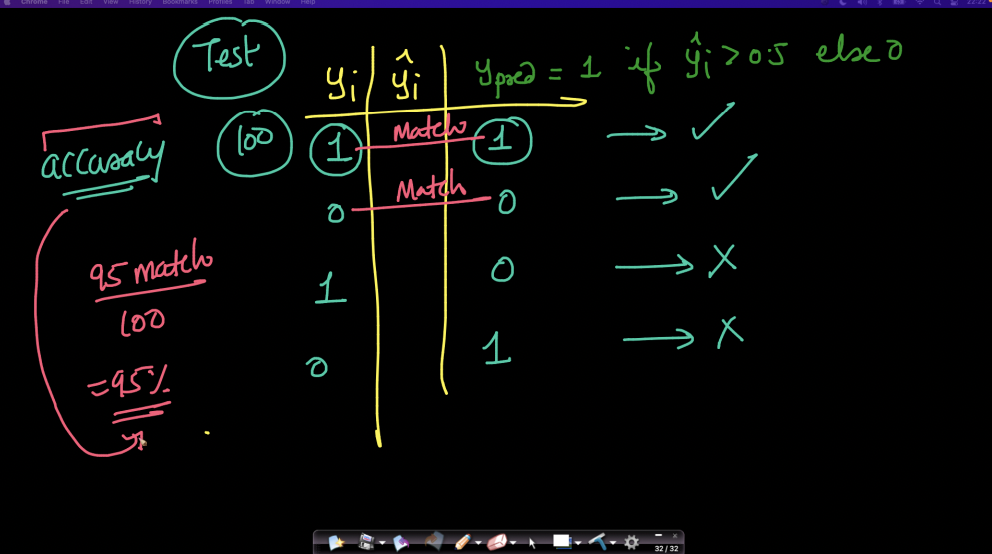

#### **How  can we say, that the model we have got is the best one ?**

Recall how we used threshold after we find $y_i$ so it has values either 0 or 1. Lets call it $y_{pred}$ 

- Now for accuracy metrics, we use a simple concept of how many times $y_i$ and $y_{pred}$ matches.

lets take an example:
- Supposedly we consider 0.5 as threshold 
- $y_{pred} = 1 $ if $y_î > 0.5$ else 0
- Now, if we had 100 samples on our test data
    - accuracy finds where $y_i$ has the same value as $y_{pred}$

- Now if there are 95 matches out of 100 samples , then accuracy = $\frac{95}{100}*100 = 95%$ 

Lets get back to our scratch code implemented model and check how it performed on our test data. 


Accuracy on test data

In [ ]:
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

In [ ]:
# Creating threshold as 0.5 
y_pred = [1 if y_hat >=0.5 else 0 for y_hat in predict(X_test,opt_weight)]

#Finding test Accuracy
accuracy_metric(y_test, y_pred)

94.0